In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\Users\melod\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\melod\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from LDA2Vec import LDA2Vec

In [3]:
df = pd.read_csv('../data/processed_reviews.csv')

In [4]:
df.isna().sum()

brand            679
product_title      0
proxy_date         0
retailer           0
category           0
subcategory        0
review_text        0
star_rating        0
topic              0
brand_type         0
dtype: int64

In [5]:
lda2vec_model = LDA2Vec(df)

In [6]:
subcategories = ['SPRAY CLEANERS BLEACH CLEANERS', 'WOOD/FURNITURE/DUST']
result_df = lda2vec_model.train_model(subcategories)

Creating LDA2Vec Model with 2 topics for 272 reviews (star rating 1.0) in subcategory SPRAY CLEANERS BLEACH CLEANERS
Finished creating LDA2Vec model for 1.0 star rating in 4.23 seconds

--------------------------------------------------
Creating LDA2Vec Model with 2 topics for 97 reviews (star rating 2.0) in subcategory SPRAY CLEANERS BLEACH CLEANERS
Finished creating LDA2Vec model for 2.0 star rating in 3.73 seconds

--------------------------------------------------
Creating LDA2Vec Model with 2 topics for 165 reviews (star rating 3.0) in subcategory SPRAY CLEANERS BLEACH CLEANERS
Finished creating LDA2Vec model for 3.0 star rating in 6.02 seconds

--------------------------------------------------
Creating LDA2Vec Model with 2 topics for 420 reviews (star rating 4.0) in subcategory SPRAY CLEANERS BLEACH CLEANERS
Finished creating LDA2Vec model for 4.0 star rating in 18.50 seconds

--------------------------------------------------
Creating LDA2Vec Model with 1 topics for 3777 review

In [7]:
result_df.shape

(640606, 15)

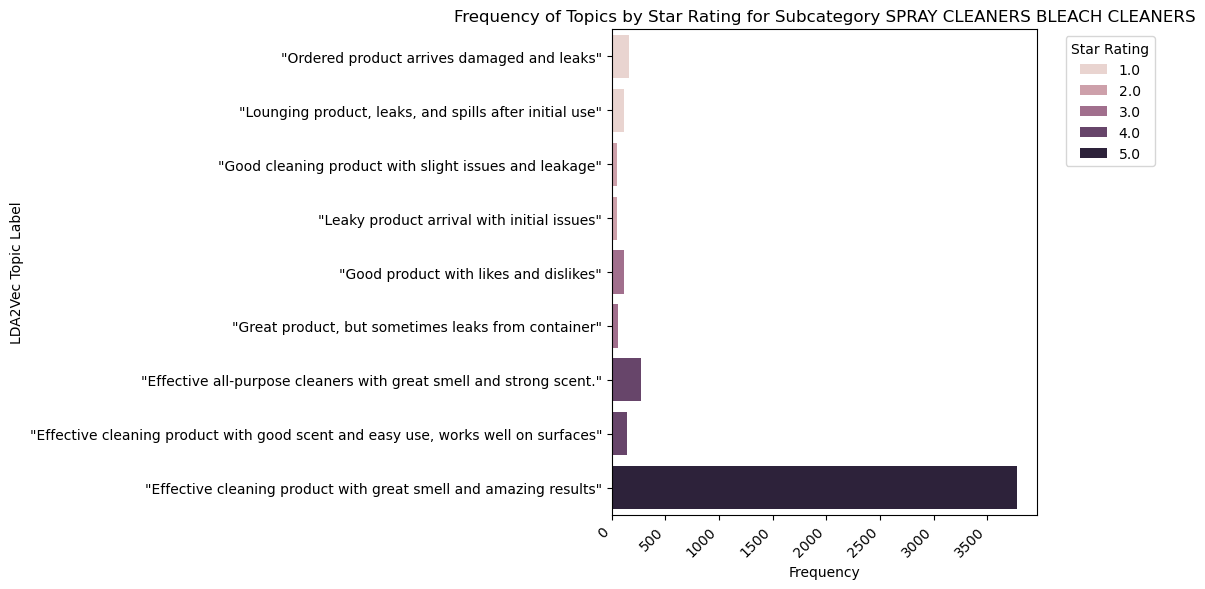

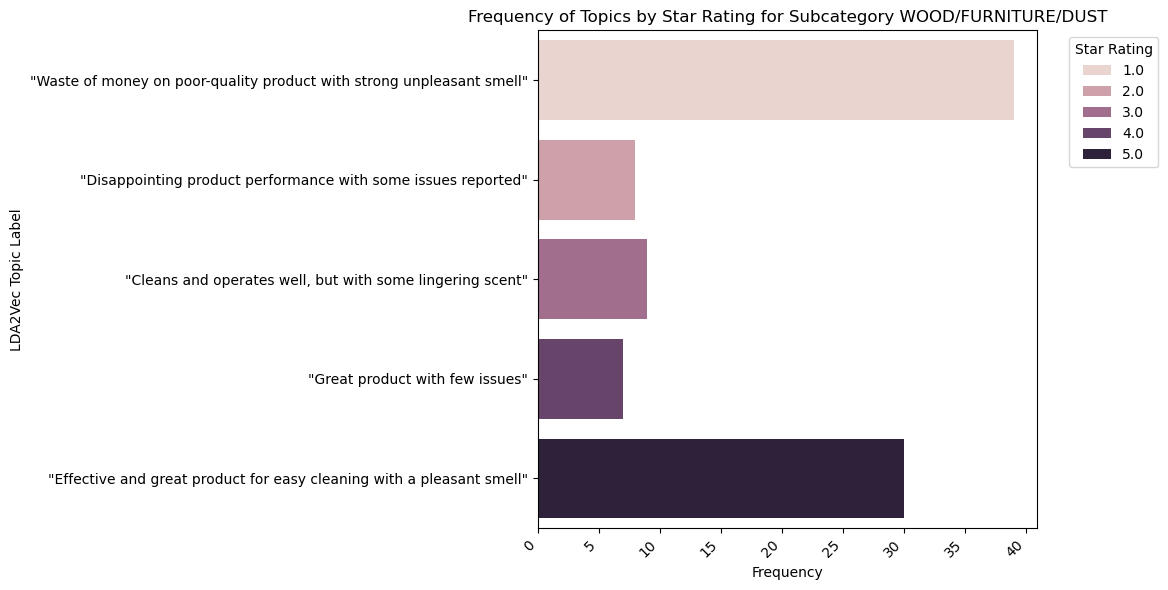

In [8]:
for subcategory in subcategories:
    df_subcategory = result_df[result_df['subcategory']==subcategory]
    df_subcategory_grouped_df = df_subcategory.groupby('star_rating')['lda2vec_topic_label'].value_counts().reset_index(name='count')
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_subcategory_grouped_df, x='count', y='lda2vec_topic_label', hue='star_rating', dodge=False)

    # Customize the plot
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Frequency of Topics by Star Rating for Subcategory {subcategory}')
    plt.xlabel('Frequency')
    plt.ylabel('LDA2Vec Topic Label')
    plt.legend(title='Star Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Display the plot
    plt.tight_layout()
    plt.show()

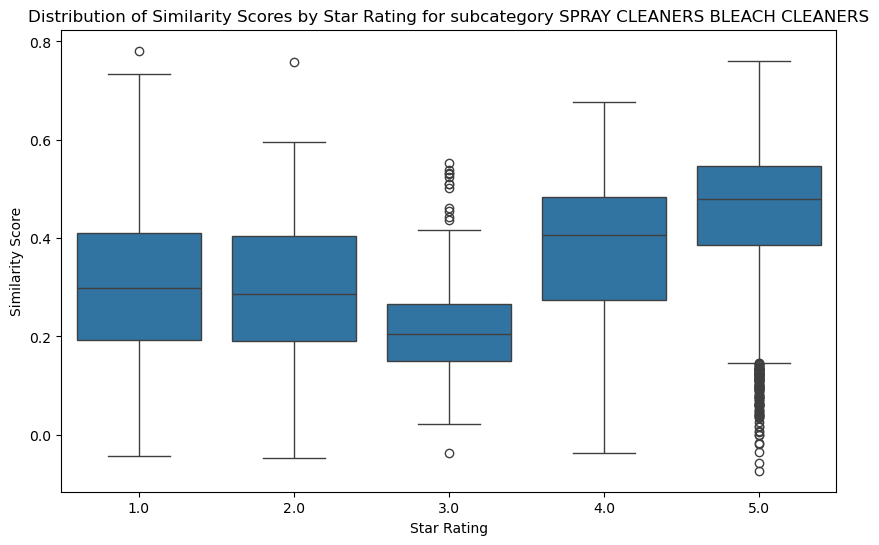

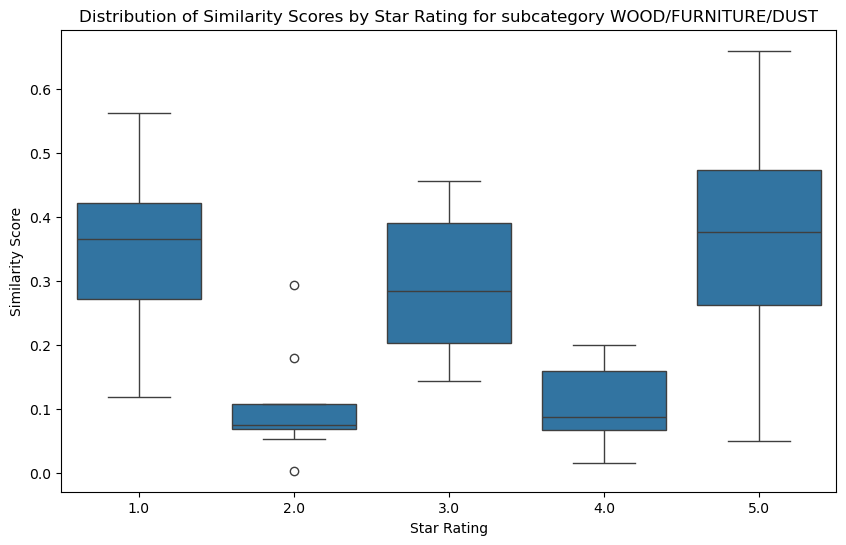

In [9]:
for subcategory in subcategories:
    df_subcategory = result_df[result_df['subcategory']==subcategory]
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_subcategory, x='star_rating', y='lda2vec_similarity_score')
    plt.title(f'Distribution of Similarity Scores by Star Rating for subcategory {subcategory}')
    plt.xlabel('Star Rating')
    plt.ylabel('Similarity Score')
    plt.show()

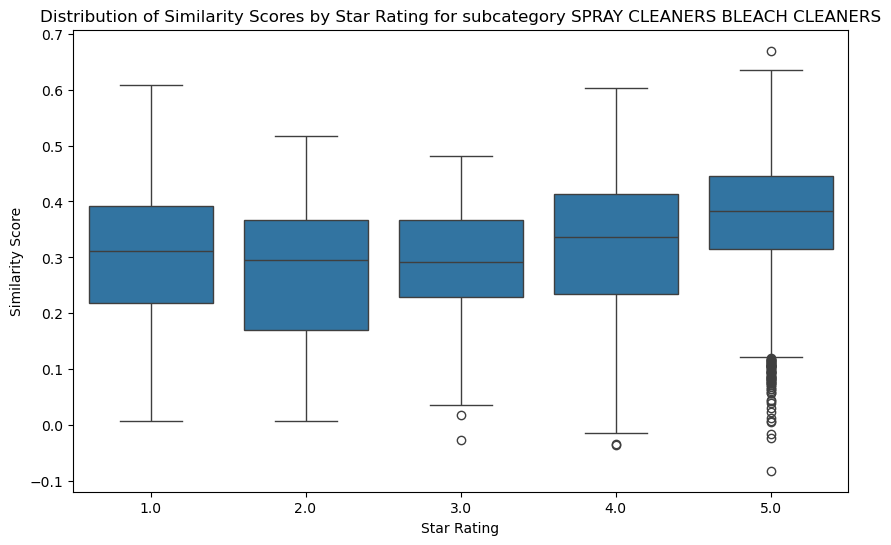

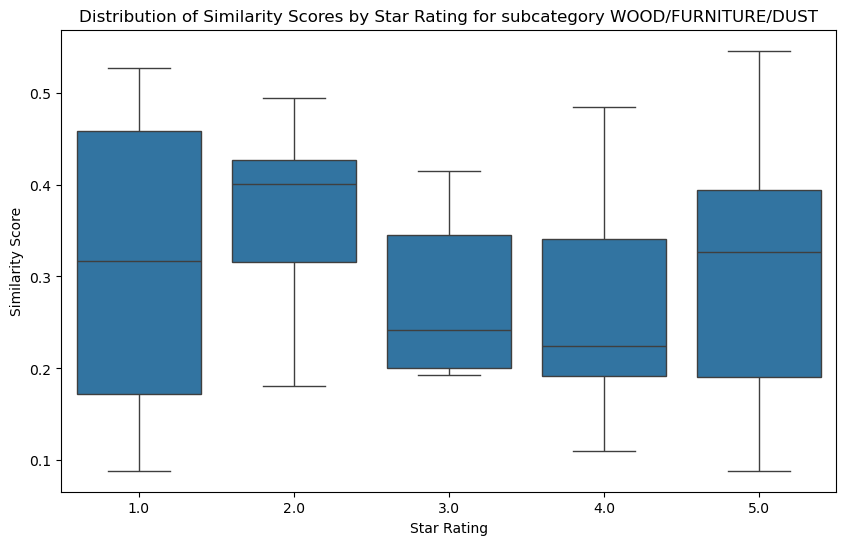

In [14]:
for subcategory in subcategories:
    df_subcategory = result_df[result_df['subcategory']==subcategory]
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_subcategory, x='star_rating', y='lda2vec_words_similarity_score')
    plt.title(f'Distribution of Similarity Scores by Star Rating for subcategory {subcategory}')
    plt.xlabel('Star Rating')
    plt.ylabel('Similarity Score')
    plt.show()

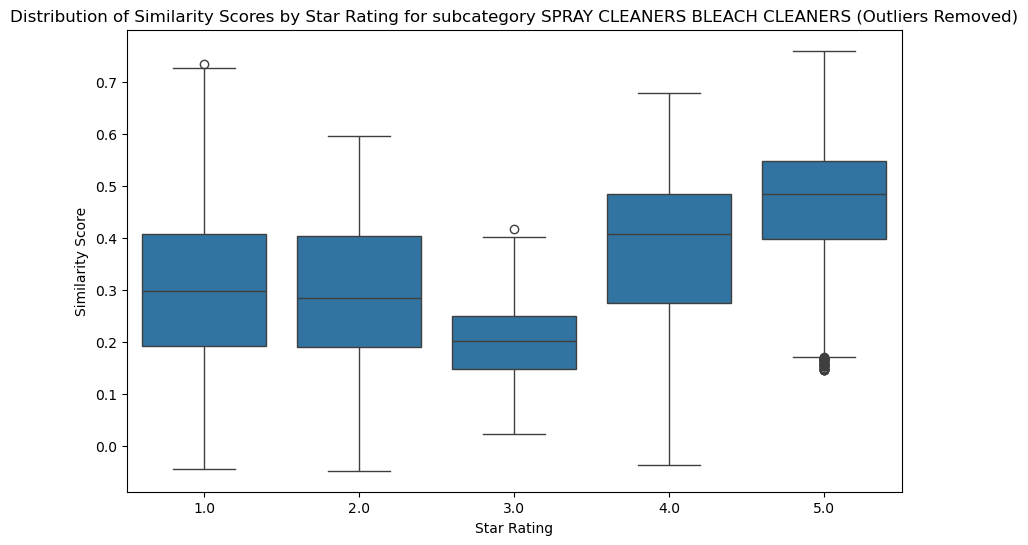

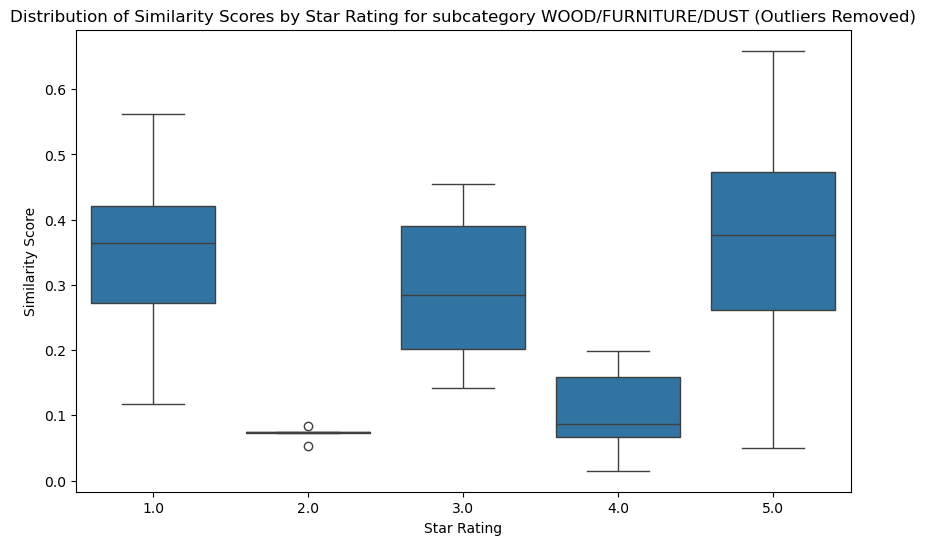

In [10]:
# similarity scores without outliers
filtered_df = pd.DataFrame()  # Initialize an empty DataFrame to store filtered data

for subcategory in subcategories:
    df_subcategory = result_df[result_df['subcategory'] == subcategory]
    
    for star_rating in df_subcategory['star_rating'].unique():
        df_rating = df_subcategory[df_subcategory['star_rating'] == star_rating]
        
        # Calculate Q1, Q3, and IQR for similarity_score
        Q1 = df_rating['lda2vec_similarity_score'].quantile(0.25)
        Q3 = df_rating['lda2vec_similarity_score'].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out the outliers
        df_filtered = df_rating[(df_rating['lda2vec_similarity_score'] >= lower_bound) & (df_rating['lda2vec_similarity_score'] <= upper_bound)]
        
        # Append filtered data to the new DataFrame
        filtered_df = pd.concat([filtered_df, df_filtered])

# Plot boxplot without outliers
for subcategory in subcategories:
    df_subcategory = filtered_df[filtered_df['subcategory'] == subcategory]
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_subcategory, x='star_rating', y='lda2vec_similarity_score')
    plt.title(f'Distribution of Similarity Scores by Star Rating for subcategory {subcategory} (Outliers Removed)')
    plt.xlabel('Star Rating')
    plt.ylabel('Similarity Score')
    plt.show()


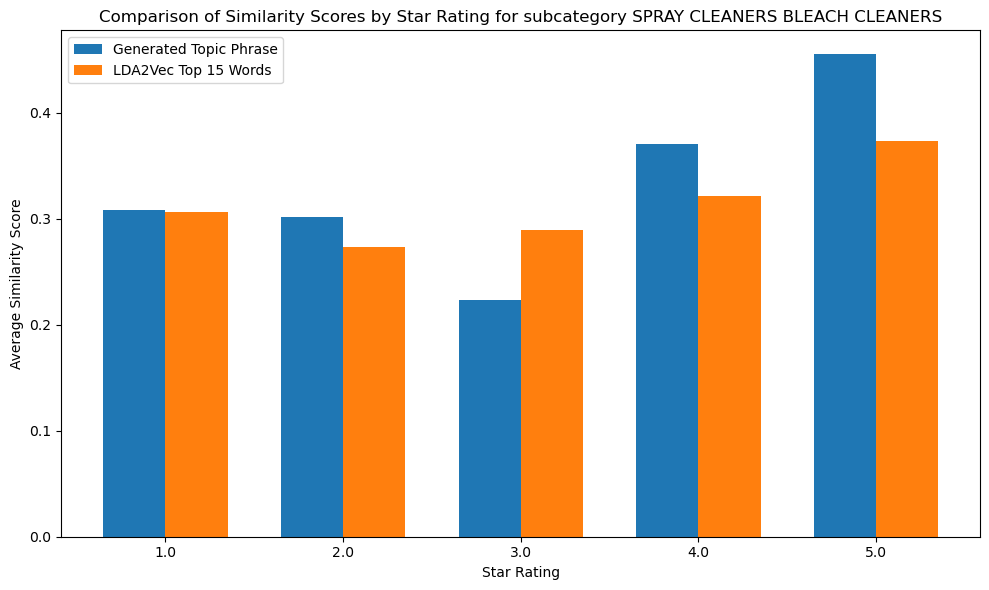

In [17]:
sub_df = result_df[result_df['subcategory']=='SPRAY CLEANERS BLEACH CLEANERS'] # Calculate the average similarity scores by star rating
avg_scores = sub_df.groupby('star_rating')[['lda2vec_similarity_score', 'lda2vec_words_similarity_score']].mean()

# Plotting the side-by-side bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of each bar
bar_width = 0.35
star_ratings = avg_scores.index
x = range(len(star_ratings))

# Plot each similarity score as bars side by side
ax.bar(x, avg_scores['lda2vec_similarity_score'], width=bar_width, label='Generated Topic Phrase')
ax.bar([i + bar_width for i in x], avg_scores['lda2vec_words_similarity_score'], width=bar_width, label='LDA2Vec Top 15 Words')

# Set the x-axis labels and chart labels
ax.set_xlabel('Star Rating')
ax.set_ylabel('Average Similarity Score')
ax.set_title('Comparison of Similarity Scores by Star Rating for subcategory SPRAY CLEANERS BLEACH CLEANERS')
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(star_ratings)
ax.legend()

plt.tight_layout()
plt.show()

In [11]:
for subcategory in subcategories:
    topic_similarity_df = lda2vec_model.get_topic_information(subcategory)

In [12]:
topic_similarity_df

,star_rating,lda2vec_topic_label,lda2vec_similarity_score,count
0,1.0,"""Waste of money on poor-quality product with s...",0.342908,39
1,2.0,"""Disappointing product performance with some i...",0.104133,8
2,3.0,"""Cleans and operates well, but with some linge...",0.296991,9
3,4.0,"""Great product with few issues""",0.107606,7
4,5.0,"""Effective and great product for easy cleaning...",0.365976,30


In [13]:
result_df[result_df['subcategory']=='SPRAY CLEANERS BLEACH CLEANERS'][['lda2vec_topic_words']]

,lda2vec_topic_words
11,"use, product, great, smell, love, work, good, ..."
12,"use, product, great, smell, love, work, good, ..."
16,"use, product, great, smell, love, work, good, ..."
69,"use, product, great, smell, love, work, good, ..."
116,"use, product, great, smell, love, work, good, ..."
...,...
210419,"use, product, great, smell, love, work, good, ..."
210422,"use, product, great, smell, love, work, good, ..."
210425,"use, product, great, smell, love, work, good, ..."
210427,"use, product, great, smell, love, work, good, ..."
